In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv

In [2]:
df = pd.read_csv(r'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/JC-20161-citibike-tripdata.csv', quoting=csv.QUOTE_NONE,  sep=',', error_bad_lines=False)

path = r'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/' # use your path
all_files = glob.glob(path + "/JC-20*.csv")
headers = {0:'triptime',1:'start',2:'end',3:'stationid',4:'station1',5:'lat1',6:'long1',7:'endid',8:'endname',9:'lan2',10:'long2',11:'bikeid',12:'usertype',13:'birthyear',14:'gender'}
li = []

for filename in all_files:
    df = pd.read_csv(filename,  header=None  ,   index_col=None,
    encoding=None)
    df = df.iloc[1:]
    df = df.rename(columns=headers)
    li.append(df)
    

frame = pd.concat(li, axis=0, ignore_index=True)

data = pd.DataFrame(frame,columns=['start','station1','bikeid'])

print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/adamo/Documents/DataminingFiles/DataminingFiles/JC/JC-20161-citibike-tripdata.csv'

In [5]:
frame = pd.read_csv(r'JC2015-2020.csv')
data = pd.DataFrame(frame,columns=['station1','lat1','long1' ])
print(data)

                            start       lat1      long1  bikeid
0             2015-09-21 14:53:16  40.717733 -74.043845   24722
1             2015-09-21 14:55:59  40.716247 -74.033459   24388
2             2015-09-21 14:56:14  40.716247 -74.033459   24442
3             2015-09-21 14:58:35  40.727596 -74.044247   24678
4             2015-09-21 14:59:55  40.727596 -74.044247   24574
...                           ...        ...        ...     ...
1658062  2020-10-31 23:32:22.8650  40.748716 -74.040443   17231
1658063  2020-10-31 23:33:22.7310  40.717733 -74.043845   46532
1658064  2020-10-31 23:37:01.7010  40.725685 -74.048790   42230
1658065  2020-10-31 23:37:46.1430  40.725685 -74.048790   45341
1658066  2020-10-31 23:40:06.3530  40.716490 -74.041050   45647

[1658067 rows x 4 columns]


In [3]:
import datetime
def get_season(date_time):
    # dummy leap year to include leap days(year-02-29) in our range
    leap_year = date_time.year
    seasons = [('winter', (datetime.date(leap_year, 1, 1), datetime.date(leap_year, 3, 20))),
               ('spring', (datetime.date(leap_year, 3, 21), datetime.date(leap_year, 6, 20))),
               ('summer', (datetime.date(leap_year, 6, 21), datetime.date(leap_year, 9, 22))),
               ('autumn', (datetime.date(leap_year, 9, 23), datetime.date(leap_year, 12, 20))),
               ('winter', (datetime.date(leap_year, 12, 21), datetime.date(leap_year, 12, 31)))]

   # if isinstance(date_time, datetime):
   #     date_time = date_time.date()
    # we don't really care about the actual year so replace it with our dummy leap_year
   # date_time = date_time.replace(year=leap_year)
    # return season our date falls in.
    return next(season for season, (start, end) in seasons
                if start <= date_time <= end)


def create_season_column(data_set, date_column):
    # cloning the input dataset.
    local = data_set.copy()
    # The apply method calls a function on each row
    local['Season'] = local[date_column].apply(get_season)
    return local

In [5]:
newdata = pd.DataFrame(frame,columns=['start','station1','bikeid'])
newdata['start'] = pd.to_datetime(newdata['start'], errors='coerce')
newdata = create_season_column(newdata, date_column='start')
newdata = newdata.groupby([ newdata['station1'],newdata['Season'],newdata['start'].dt.year,newdata['start'].dt.isocalendar().week])['start'].agg(['count'])
newdata.index = newdata.index.set_names([ 'station','season','year','week'])
ed = newdata.sort_values(['year','week','count'])
ed.to_csv('newdatacount.csv')
ed.head()

count
station        season year week       
MLK Light Rail summer 2015 39        1
Union St       autumn 2015 39        2
Bayside Park   summer 2015 39        3
Columbia Park  summer 2015 39        3
MLK Light Rail autumn 2015 39        3

In [25]:
everydata = pd.DataFrame(frame,columns=['station1','start','lat1','long1','bikeid'])
#everydata.to_csv('JC2015-2020.csv',index=False) save aone file with all JCs from 2015-2020
print(everydata) 

                 station1                     start       lat1      long1  \
0               City Hall       2015-09-21 14:53:16  40.717733 -74.043845   
1          Exchange Place       2015-09-21 14:55:59  40.716247 -74.033459   
2          Exchange Place       2015-09-21 14:56:14  40.716247 -74.033459   
3           Hamilton Park       2015-09-21 14:58:35  40.727596 -74.044247   
4           Hamilton Park       2015-09-21 14:59:55  40.727596 -74.044247   
...                   ...                       ...        ...        ...   
1658062  Heights Elevator  2020-10-31 23:32:22.8650  40.748716 -74.040443   
1658063         City Hall  2020-10-31 23:33:22.7310  40.717733 -74.043845   
1658064  Monmouth and 6th  2020-10-31 23:37:01.7010  40.725685 -74.048790   
1658065  Monmouth and 6th  2020-10-31 23:37:46.1430  40.725685 -74.048790   
1658066           York St  2020-10-31 23:40:06.3530  40.716490 -74.041050   

         bikeid  
0         24722  
1         24388  
2         24442  
3  

In [6]:
# list of states 
stationnamesframe =   everydata.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station1','lat1','long1'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
print(stationnamesframe) # 63 stations in JC
stationnames =  pd.DataFrame(stationnamesframe , columns=['station1'])['station1'].to_numpy().tolist()
print(stationnames)
#stationnamesframe.to_csv("stations.csv",index=False ) save file with all stations 

                           station1       lat1      long1
0                         City Hall  40.717733 -74.043845
1                    Exchange Place  40.716247 -74.033459
3                     Hamilton Park  40.727596 -74.044247
5                           Sip Ave  40.730743 -74.063784
12                  Christ Hospital  40.734786 -74.050444
...                             ...        ...        ...
663806                     Grand St  40.715178 -74.037683
781528               Jackson Square  40.711130 -74.078900
994382                      Sip Ave  40.730897 -74.063913
1079005  Hoboken Ave at Monmouth St  40.735208 -74.046964
1134359  Columbus Dr at Exchange Pl  40.716870 -74.032810

[64 rows x 3 columns]
['City Hall', 'Exchange Place', 'Hamilton Park', 'Sip Ave', 'Christ Hospital', 'Baldwin at Montgomery', 'Warren St', 'Newport PATH', 'Newark Ave', 'Brunswick St', 'Newport Pkwy', 'Bayside Park', 'Grove St PATH', 'Riverview Park', 'Essex Light Rail', 'Paulus Hook', 'Columbia Park',

In [32]:
#linker


linker = pd.DataFrame(everydata,columns=['start','station1','endname'])
linker['start'] = pd.to_datetime(linker['start'], errors='coerce')
linker = linker.groupby([ linker['start'].dt.year  ,'station1','endname']).count()
linker.index = linker.index.set_names([ 'year','st1','st2'])
linker = linker.reset_index()

linker = pd.DataFrame(linker , columns=['year','st1','st2'] )
linker = linker[linker['year'] == 2019]
linker.to_csv('linker.csv')

In [29]:
data['start'] = pd.to_datetime(data['start'], errors='coerce')

In [31]:
data = create_season_column(data, date_column='start')

In [36]:
print(data)

                          start          station1  bikeid  Season
0       2015-09-21 14:53:16.000         City Hall   24722  summer
1       2015-09-21 14:55:59.000    Exchange Place   24388  summer
2       2015-09-21 14:56:14.000    Exchange Place   24442  summer
3       2015-09-21 14:58:35.000     Hamilton Park   24678  summer
4       2015-09-21 14:59:55.000     Hamilton Park   24574  summer
...                         ...               ...     ...     ...
1658062 2020-10-31 23:32:22.865  Heights Elevator   17231  autumn
1658063 2020-10-31 23:33:22.731         City Hall   46532  autumn
1658064 2020-10-31 23:37:01.701  Monmouth and 6th   42230  autumn
1658065 2020-10-31 23:37:46.143  Monmouth and 6th   45341  autumn
1658066 2020-10-31 23:40:06.353           York St   45647  autumn

[1658067 rows x 4 columns]


In [37]:
#group count by city
li2 = []
for station in stationnames:
    filter2= data["station1"]==station
    statefilter = pd.DataFrame(data.where(filter2),columns=['start' ,'bikeid' ,'Season']).dropna()
    li2.append(statefilter)

In [39]:
# join all tables
print(len(stationnames))
alldata = li2[0]
alldata = alldata.groupby([ alldata['start'].dt.year ,  alldata['start'].dt.isocalendar().week ,alldata['Season']])['bikeid'].agg(['count'])
alldata.columns = [stationnames[0]]
alldata.index = alldata.index.set_names([ 'year','week','season'])
for i in range(1,len(stationnames)):
    d1 = li2[i]
    d1 = d1.groupby([ d1['start'].dt.year,d1['start'].dt.isocalendar().week,d1['Season']])['bikeid'].agg(['count'])
    d1.columns = [stationnames[i]]
    d1.index = d1.index.set_names([ 'year','week','season'])
    alldata = pd.merge(alldata,d1,on=['year','week'],how='outer')

64


MemoryError: Unable to allocate 1.20 GiB for an array with shape (1, 160694522) and data type int64

In [33]:
alldata = alldata.sort_values(by=['year','week']).fillna(0)
alldata.to_csv('citycountbyweekyearv2.csv')

NameError: name 'alldata' is not defined

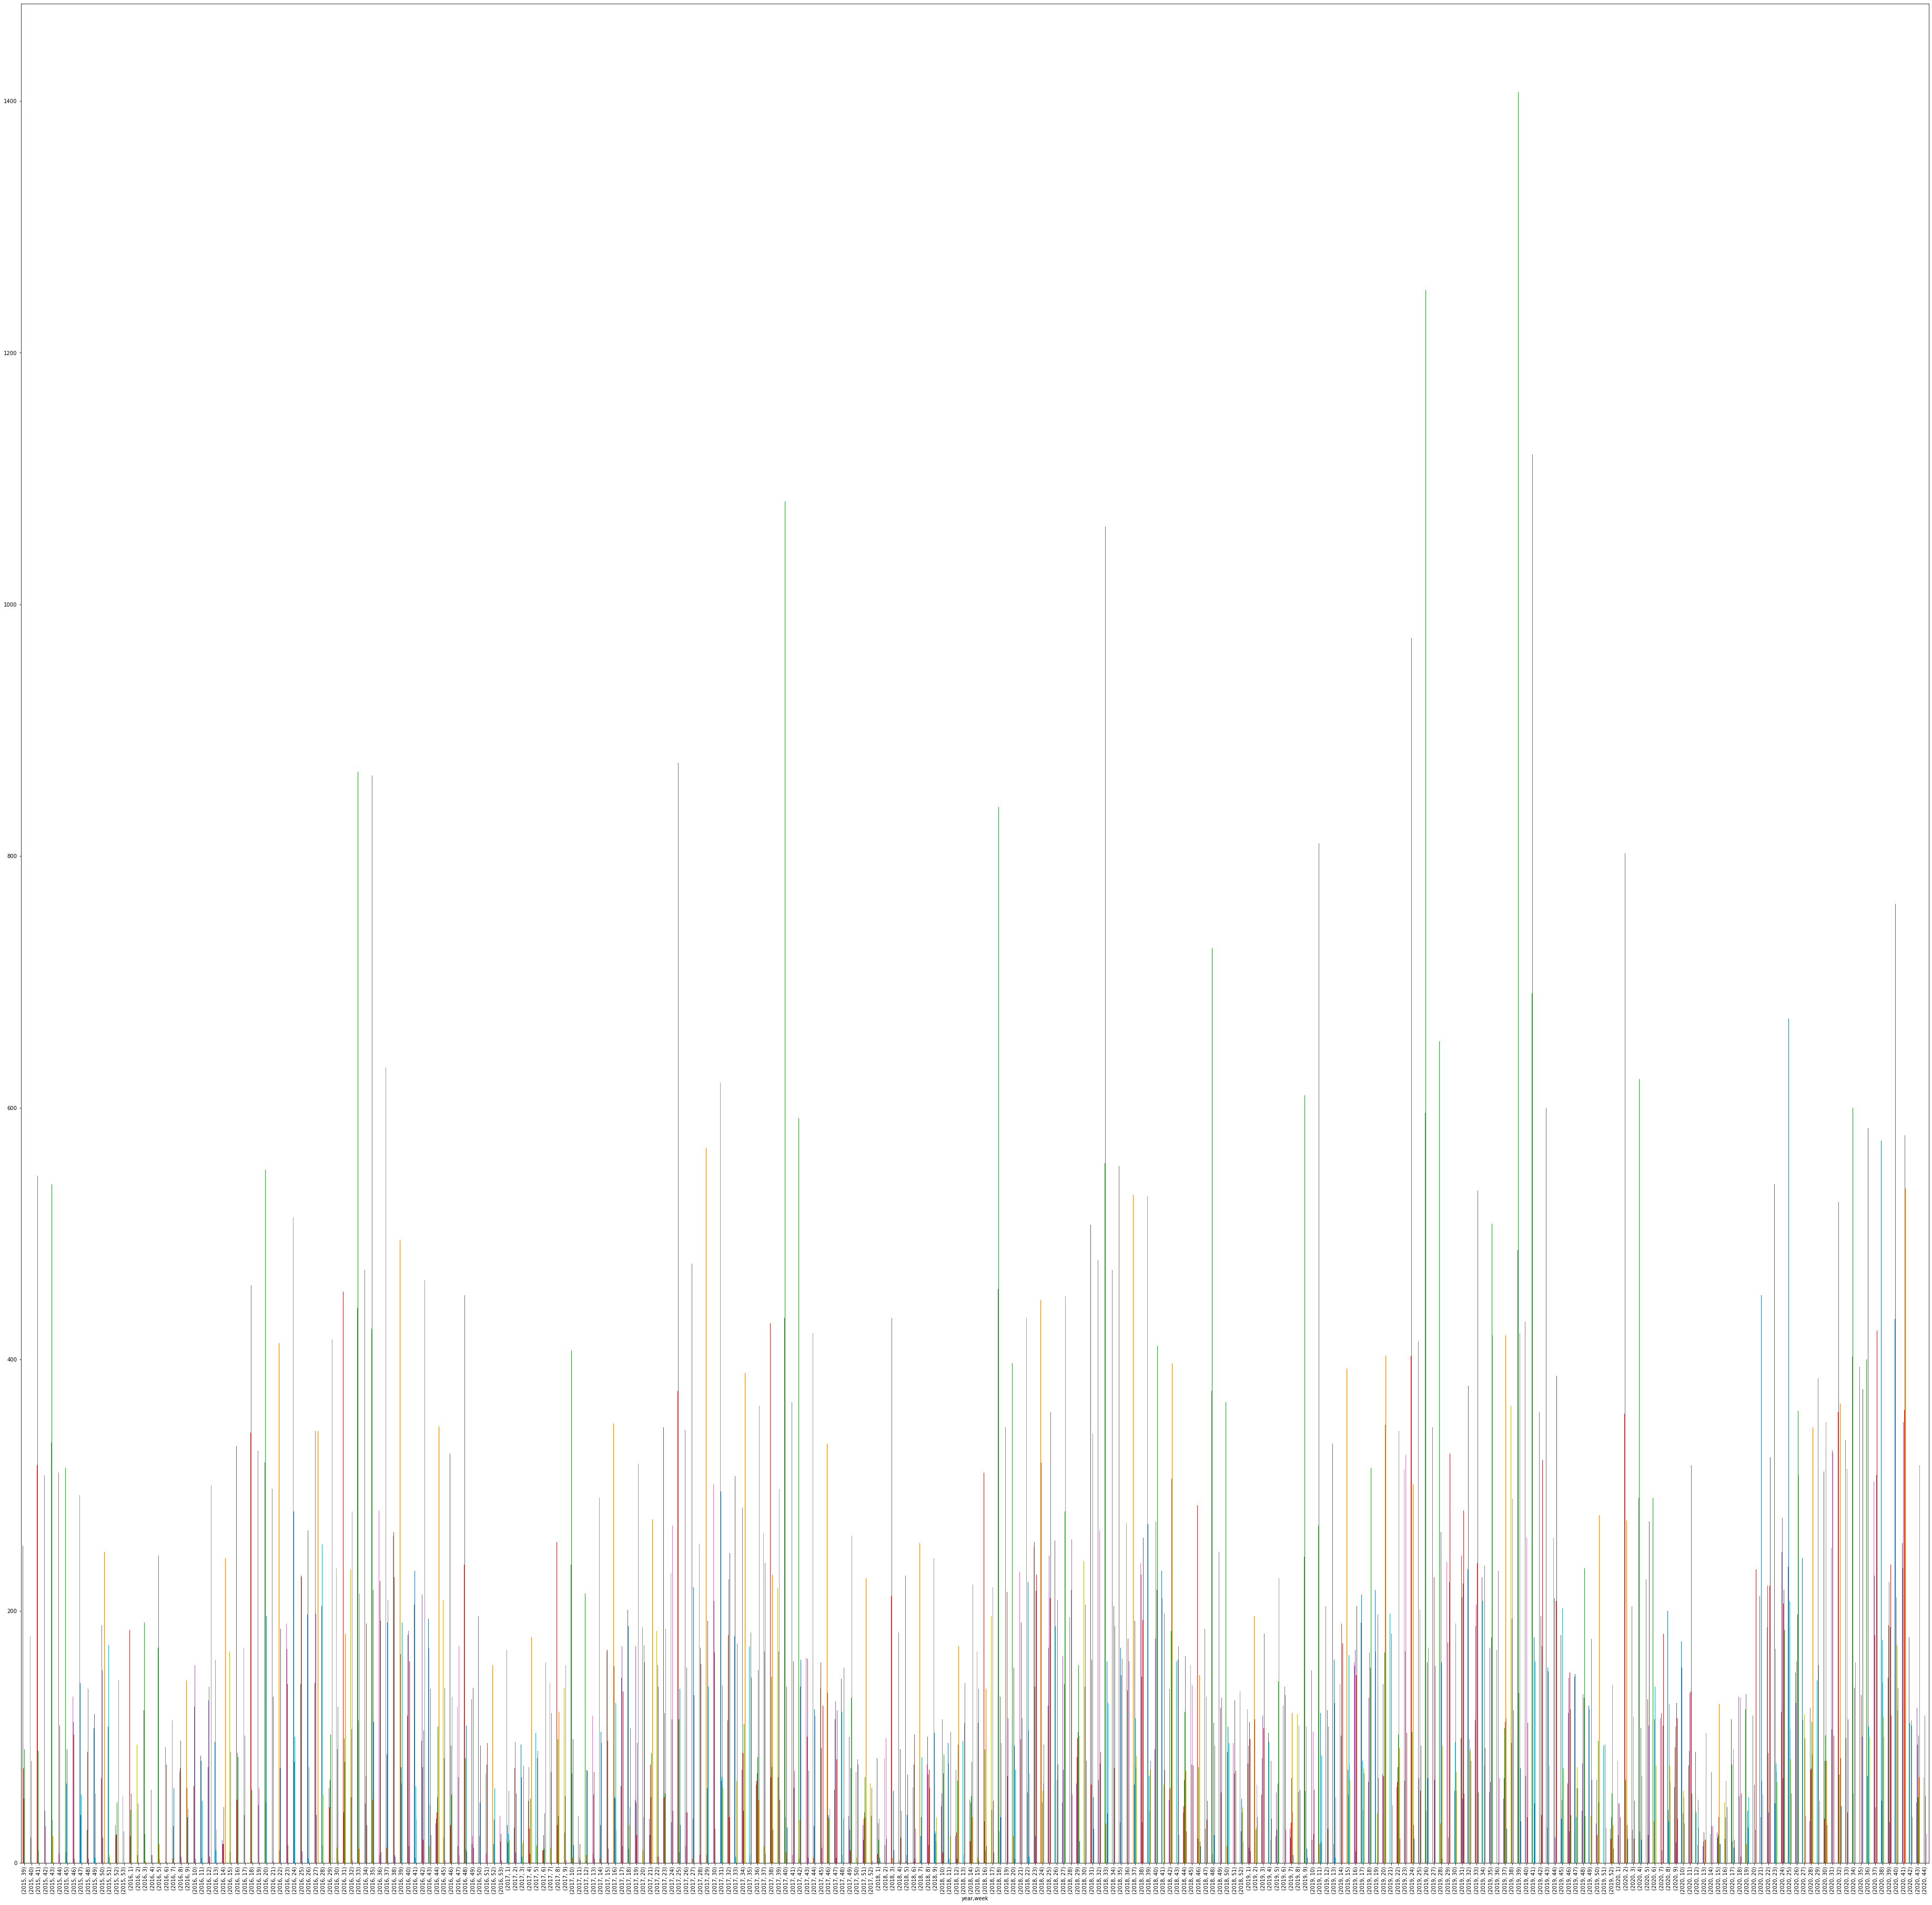

In [32]:
#visualize all data 
alldata.plot(kind='bar',legend=False)
figure = plt.gcf() 
figure.set_size_inches(65, 65)
plt.savefig('alldata.png',dpi=100)

In [181]:
stations = alldata.groupby([alldata['start'].dt.date]).agg({'bikeid': ['count']})

In [182]:
print (stations)

           bikeid
            count
start            
2020-01-01     47
2020-01-02     81
2020-01-03    101
2020-01-04     51
2020-01-05     70
...           ...
2020-10-27     78
2020-10-28     76
2020-10-29     31
2020-10-30     40
2020-10-31      8

[305 rows x 1 columns]


In [192]:
yearweekcount = grovefilter.groupby([   grovefilter['start'].dt.year ,grovefilter['start'].dt.isocalendar().week ])['bikeid'].agg(['count'])
yearweekcount.columns = ['Grove St PATH']
yearcount = grovefilter.groupby([   grovefilter['start'].dt.year ])['bikeid'].agg(['count'])
monthcount = grovefilter.groupby([   grovefilter['start'].dt.year ,grovefilter['start'].dt.month ])['bikeid'].agg(['count'])

yearcount.columns = ['Grove St PATH']

63


In [223]:
yearweekcount.index = yearweekcount.index.set_names([  'Year', 'Week'])
alldata = alldata.fillna(0)
print(alldata )

      City Hall  Exchange Place  Hamilton Park  Sip Ave  Christ Hospital  \
Year                                                                       
2015       1978          4109.0           4116     3398              861   
2016       7791         19014.0          15300    17137             2366   
2017       8422         19393.0          19810    15598             2393   
2018       8829         18970.0          20867    18184             2420   
2019      10186          5304.0          24106    19085             2432   
2020       8700             0.0          13415    12174             1477   

      Baldwin at Montgomery  Warren St  Newport PATH  Newark Ave  \
Year                                                               
2015                    917       2236          3468        2551   
2016                   4529       8344         13363        9168   
2017                   3686       9206         12516        9031   
2018                   4069       9258         1524

In [169]:
yearweekcount.head()

Grove St PATH
Year Week               
2015 39              472
     40              410
     41              546
     42              562
     43              539

In [173]:
yearcount.index = yearcount.index.set_names(['Year'])
print(yearcount)

      Grove St PATH
Year               
2015           5989
2016          28736
2017          35856
2018          40931
2019          46662
2020          20572


<AxesSubplot:xlabel='Year,Week'>

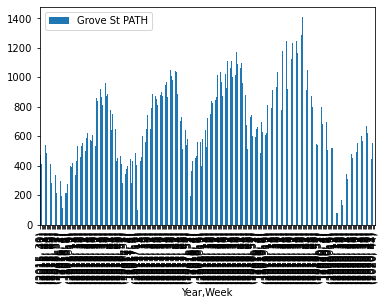

In [165]:
yearweekcount.plot(kind='bar')

<AxesSubplot:xlabel='Year'>

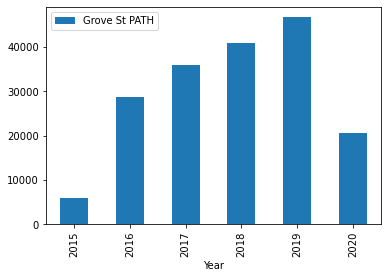

In [174]:
yearcount.plot(kind='bar')

<AxesSubplot:xlabel='start,start'>

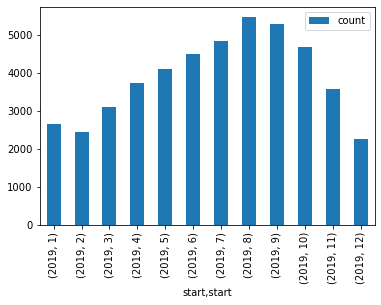

In [190]:
monthcount.plot(kind='bar')

<AxesSubplot:xlabel='start,start'>

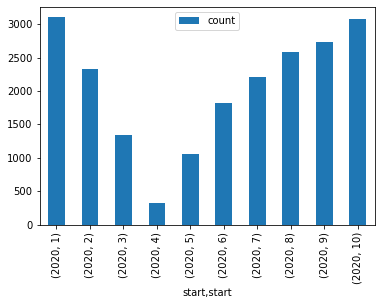

In [193]:
monthcount.plot(kind='bar')

<AxesSubplot:xlabel='Year'>

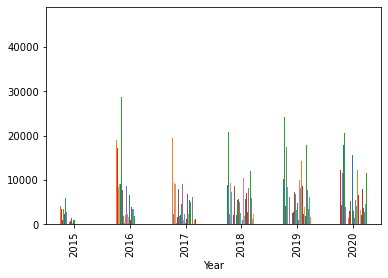

In [226]:
alldata.plot(kind='bar' , legend=False)

In [227]:
alldata.to_csv('year.csv')

In [264]:
yeartrans =  alldata.T

In [265]:
yeartrans.to_csv('yeartranspose.csv')

In [292]:
y = pd.DataFrame(yeartrans)
y.head()
test = pd.DataFrame( stationnamesframe)
y15= pd.DataFrame(y.iloc[:, 0])
y15.index = y15.index.set_names([  'station1' ])
y16= pd.DataFrame(y.iloc[:, 1])
y16.index = y16.index.set_names([  'station1' ])
y17= pd.DataFrame(y.iloc[:, 2])
y17.index = y17.index.set_names([  'station1' ])
y18= pd.DataFrame(y.iloc[:, 3])
y18.index = y18.index.set_names([  'station1' ])
y19= pd.DataFrame(y.iloc[:, 4])
y19.index = y19.index.set_names([  'station1' ])
y20= pd.DataFrame(y.iloc[:, 5])
y20.index = y20.index.set_names([  'station1' ])
test=pd.merge(test,y15,on='station1',how='outer')
test=pd.merge(test,y16,on='station1',how='outer')
test=pd.merge(test,y17,on='station1',how='outer')
test=pd.merge(test,y18,on='station1',how='outer')
test=pd.merge(test,y19,on='station1',how='outer')
test=pd.merge(test,y20,on='station1',how='outer')
print(test)

                      station1                lat1               long1  \
0                    City Hall          40.7177325          -74.043845   
1               Exchange Place          40.7162469         -74.0334588   
2                Hamilton Park        40.727595966       -74.044247311   
3                      Sip Ave   40.73074262530658  -74.06378388404846   
4                      Sip Ave   40.73089709786179  -74.06391263008118   
..                         ...                 ...                 ...   
59                  Bergen Ave  40.722103786686034  -74.07145500183105   
60                    Grand St   40.71517767732029  -74.03768330812454   
61              Jackson Square            40.71113            -74.0789   
62  Hoboken Ave at Monmouth St   40.73520838045357  -74.04696375131607   
63  Columbus Dr at Exchange Pl            40.71687           -74.03281   

      2015     2016     2017     2018     2019     2020  
0   1978.0   7791.0   8422.0   8829.0  10186.0   8700

In [289]:
test.to_csv('geoyear.csv',index=False )

In [293]:
lowerdf = pd.read_csv(r'JC2015-2020.csv')

In [302]:
newdf = pd.DataFrame(lowerdf,columns=['stationid','long1','lat1' , 'station1'])
newdf = newdf.drop_duplicates() 
print(newdf)

         stationid      long1       lat1                    station1
0             3185 -74.043845  40.717733                   City Hall
1             3183 -74.033459  40.716247              Exchange Place
3             3203 -74.044247  40.727596               Hamilton Park
5             3195 -74.063784  40.730743                     Sip Ave
12            3212 -74.050444  40.734786             Christ Hospital
...            ...        ...        ...                         ...
663806        3681 -74.037683  40.715178                    Grand St
781528        3694 -74.078900  40.711130              Jackson Square
994382        3195 -74.063913  40.730897                     Sip Ave
1079005       3791 -74.046964  40.735208  Hoboken Ave at Monmouth St
1134359       3792 -74.032810  40.716870  Columbus Dr at Exchange Pl

[64 rows x 4 columns]


In [303]:
newdf.to_csv('newdf.csv',index=False)

In [304]:
startend = pd.DataFrame(lowerdf,columns=['stationid','endid'])
print(startend)

         stationid  endid
0             3185   3185
1             3183   3187
2             3183   3183
3             3203   3203
4             3203   3186
...            ...    ...
1658062       3198   3678
1658063       3185   3681
1658064       3278   3278
1658065       3278   3278
1658066       3481   3273

[1658067 rows x 2 columns]


In [305]:
startend.to_csv('startend.csv',index=False)

In [50]:
d = dict(enumerate(stationnames, 1))
print(d)
kilearn = pd.DataFrame( data )
kilearn = kilearn.groupby([ kilearn['start'].dt.year,kilearn['start'].dt.isocalendar().week,kilearn['station1']])['bikeid'].agg(['count'])
kilearn.columns = ['anzahl']
kilearn.index = kilearn.index.set_names([ 'year','week','station'])
kilearn.to_csv('weekcount.csv')
#test = pd.get_dummies(kilearn,prefix=['station'])
print(kilearn)

{1: 'City Hall', 2: 'Exchange Place', 3: 'Hamilton Park', 4: 'Sip Ave', 5: 'Christ Hospital', 6: 'Baldwin at Montgomery', 7: 'Warren St', 8: 'Newport PATH', 9: 'Newark Ave', 10: 'Brunswick St', 11: 'Newport Pkwy', 12: 'Bayside Park', 13: 'Grove St PATH', 14: 'Riverview Park', 15: 'Essex Light Rail', 16: 'Paulus Hook', 17: 'Columbia Park', 18: 'Heights Elevator', 19: 'NJCU', 20: 'MLK Light Rail', 21: '5 Corners Library', 22: 'Dey St', 23: 'Oakland Ave', 24: 'Hilltop', 25: 'Van Vorst Park', 26: 'McGinley Square', 27: 'Central Ave', 28: 'JC Medical Center', 29: 'North St', 30: 'Lincoln Park', 31: 'Liberty Light Rail', 32: 'West Side Light Rail', 33: 'Pershing Field', 34: 'Garfield Ave Station', 35: 'Union St', 36: 'Jersey & 6th St', 37: 'Morris Canal', 38: 'Jersey & 3rd', 39: 'Lafayette Park', 40: 'Monmouth and 6th', 41: 'Dixon Mills', 42: 'Marin Light Rail', 43: 'Manila & 1st', 44: 'Columbus Drive', 45: 'Bethune Center', 46: 'Leonard Gordon Park', 47: 'Danforth Light Rail', 48: 'Brunswic

In [26]:
everydata['start'] = pd.to_datetime(everydata['start'], errors='coerce')

In [23]:

plotdata = everydata.groupby([ everydata['start'].dt.year,everydata['start'].dt.isocalendar().week,everydata['station1']] , as_index=False).agg(['count', 'mean' , 'sum' ])

KeyError: "['count'] not in index"

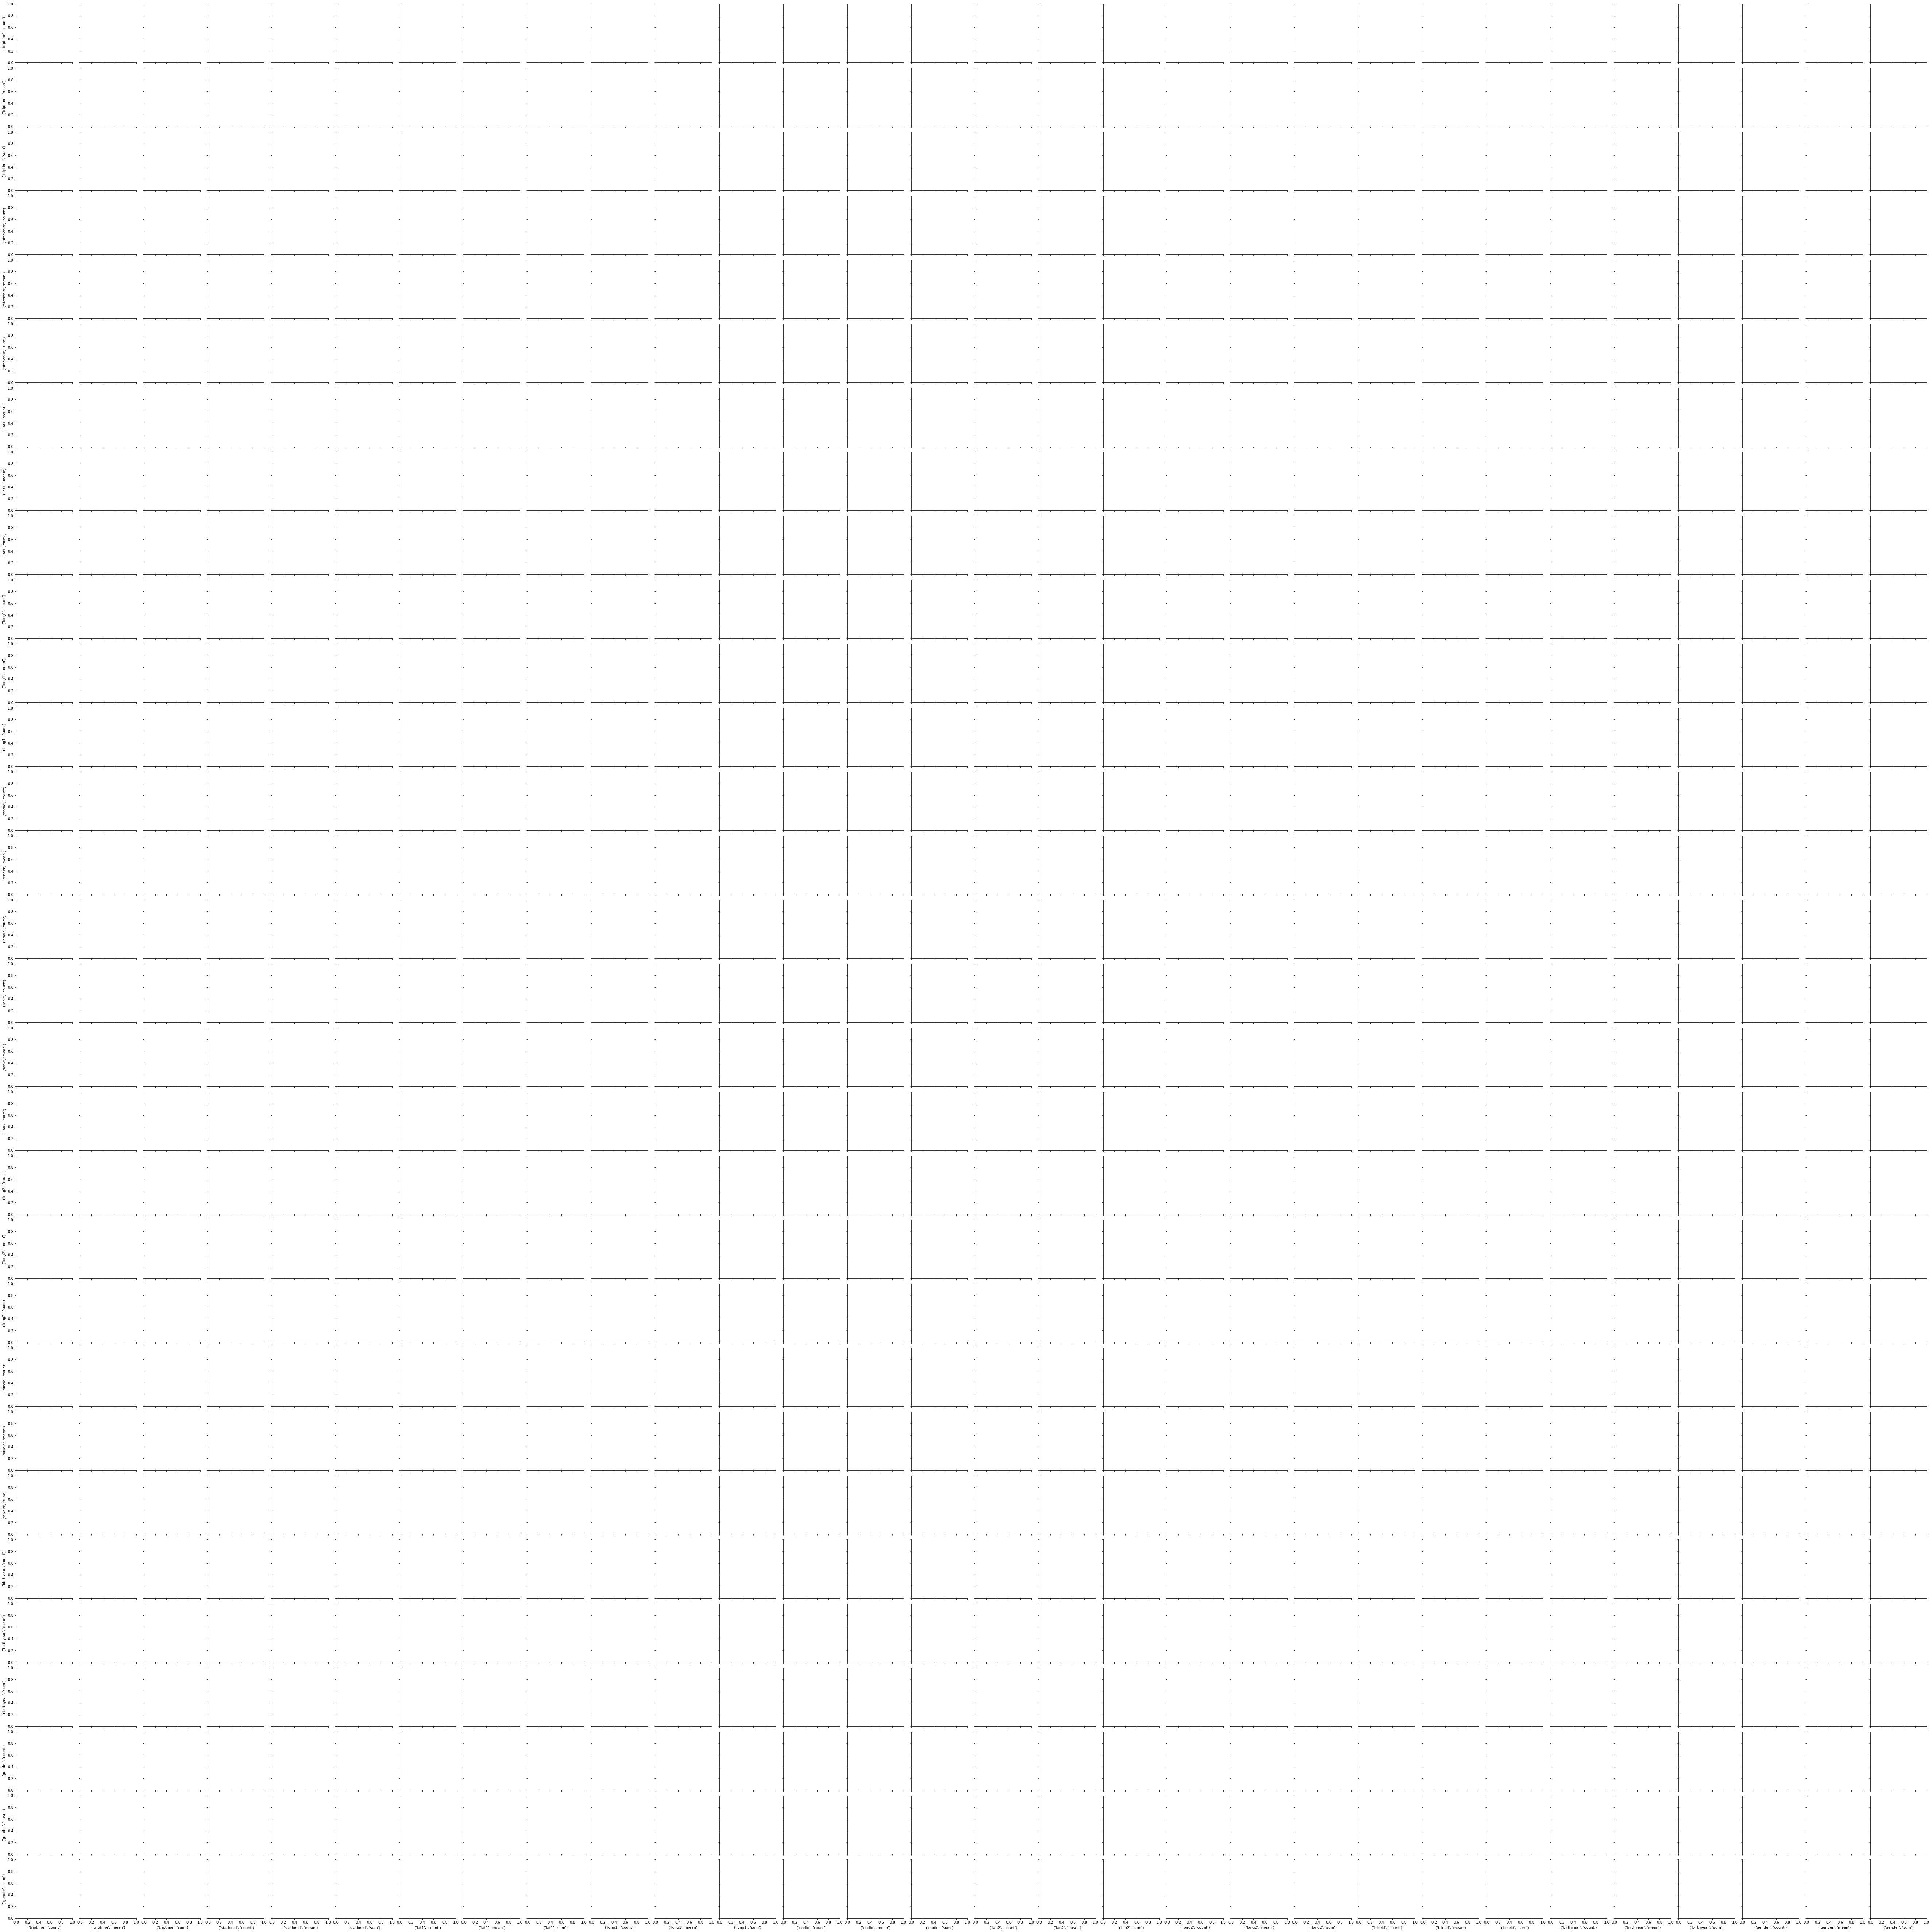

In [24]:
import seaborn as sns
sns_plot  = sns.pairplot(plotdata, diag_kind='kde')
sns_plot.savefig("output.jpg",dpi=300)

In [12]:
plotdata

triptime                       stationid  \
                                    count          mean     sum     count   
start week station1                                                         
2015  39   5 Corners Library           43   2839.627907  122104        43   
           Baldwin at Montgomery       66    826.818182   54570        66   
           Bayside Park                16  13735.812500  219773        16   
           Brunswick St               186    777.983871  144705       186   
           Central Ave                 25    862.800000   21570        25   
...                                   ...           ...     ...       ...   
2020  44   Union St                    12   1618.000000   19416        12   
           Van Vorst Park              68    620.485294   42193        68   
           Warren St                  131    783.290076  102611       131   
           Washington St               93    802.505376   74633        93   
           York St                     28    685.392857   19191        28   

                                                lat1                          \
                                  mean     sum count       mean          sum   
start week station1                                                            
2015  39   5 Corners Library      3220  138460    43  40.734961  1751.603324   
           Baldwin at Montgomery  3225  212850    66  40.723659  2687.761487   
           Bayside Park           3217   51472    16  40.698651   651.178409   
           Brunswick St           3209  596874   186  40.724176  7574.696829   
           Central Ave            3215   80375    25  40.746730  1018.668247   
...                                ...     ...   ...        ...          ...   
2020  44   Union St               3191   38292    12  40.718211   488.618536   
           Van Vorst Park         3213  218484    68  40.718489  2768.857247   
           Warren St              3187  417497   131  40.721124  5334.467192   
           Washington St          3638  338334    93  40.724294  3787.359351   
           York St                3481   97468    28  40.716490  1140.061720   

                                 long1  ...         long2 bikeid  \
                                 count  ...           sum  count   
start week station1                     ...                        
2015  39   5 Corners Library        43  ...  -3184.270186     43   
           Baldwin at Montgomery    66  ...  -4887.358354     66   
           Bayside Park             16  ...  -1184.918158     16   
           Brunswick St            186  ... -13772.215019    186   
           Central Ave              25  ...  -1851.283204     25   
...                                ...  ...           ...    ...   
2020  44   Union St                 12  ...   -888.871035     12   
           Van Vorst Park           68  ...  -5034.988002     68   
           Warren St               131  ...  -9699.289281    131   
           Washington St            93  ...  -6885.761313     93   
           York St                  28  ...  -2073.173976     28   

                                                        birthyear  \
                                          mean      sum     count   
start week station1                                                 
2015  39   5 Corners Library      24531.534884  1054856        34   
           Baldwin at Montgomery  24550.045455  1620303        49   
           Bayside Park           24569.875000   393118         7   
           Brunswick St           24560.715054  4568293       167   
           Central Ave            24525.760000   613144        20   
...                                        ...      ...       ...   
2020  44   Union St               41797.083333   501565        12   
           Van Vorst Park         40238.470588  2736216        68   
           Warren St              40976.465649  5367917       131   
           Washington St          42265.344086  3930

In [29]:
pairframe = pd.DataFrame(pd.read_csv('pairplot.csv'))

In [26]:
pairframe = pairframe.reset_index()

In [30]:
pairframe

start  week               station1  triptime_count  triptime_mean  \
0       2015    39      5 Corners Library              43    2839.627907   
1       2015    39  Baldwin at Montgomery              66     826.818182   
2       2015    39           Bayside Park              16   13735.812500   
3       2015    39           Brunswick St             186     777.983871   
4       2015    39            Central Ave              25     862.800000   
...      ...   ...                    ...             ...            ...   
12708   2020    44               Union St              12    1618.000000   
12709   2020    44         Van Vorst Park              68     620.485294   
12710   2020    44              Warren St             131     783.290076   
12711   2020    44          Washington St              93     802.505376   
12712   2020    44                York St              28     685.392857   

       triptime_sum  stationid_count  stationid_mean  stationid_sum  \
0            122104               43            3220         138460   
1             54570               66            3225         212850   
2            219773               16            3217          51472   
3            144705              186            3209         596874   
4             21570               25            3215          80375   
...             ...              ...             ...            ...   
12708         19416               12            3191          38292   
12709         42193               68            3213         218484   
12710        102611              131            3187         417497   
12711         74633               93            3638         338334   
12712         19191               28            3481          97468   

       lat1_count  ...     long2_sum  bikeid_count   bikeid_mean  bikeid_sum  \
0              43  ...  -3184.270186            43  24531.534884     1054856   
1              66  ...  -4887.358354            66  24550.045455     1620303   
2              16  ...  -1184.918158            16  24569.875000      393118   
3             186  ... -13772.215019           186  24560.715054     4568293   
4              25  ...  -1851.283204            25  24525.760000      613144   
...           ...  ...           ...           ...           ...         ...   
12708          12  ...   -888.871035            12  41797.083333      501565   
12709          68  ...  -5034.988002            68  40238.470588     2736216   
12710         131  ...  -9699.289281           131  40976.465649     5367917   
12711          93  ...  -6885.761313            93  42265.344086     3930677   
12712          28  ...  -2073.173976            28  41829.714286     1171232   

       birthyear_count  birthyear_mean  birthyear_sum  gender_count  \
0                   34     1978.941176        67284.0            43   
1                   49     1980.693878        97054.0            66   
2                    7     1968.285714        13778.0            16   
3                  167     1978.772455       330455.0           186   
4                   20     1979.950000        39599.0            25   
...                ...             ...            ...           ...   
12708               12     1983.750000        23805.0            12   
12709               68     1978.014706       134505.0            68   
12710              131     1983.106870       259787.0           131   
12711               93     1981.634409       184292.0            93   
12712               28     1979.321429        55421.0            28   

       gender_mean  gender_sum  
0         1.000000          43  
1         0.909091          60  
2         0.625000          10  
3         1.075269         200  
4         0.960000          24  
...            ...         ...  
12708     1.000000          12  
12709     1.117647          76  
12710     1.122137         147  
12711     0.913978          85  
12712     1.000000          28  

[12713 rows x 33 columns]

In [31]:
import seaborn as sns
sns_plot  = sns.pairplot(pairframe, diag_kind='kde',hue='station1')
sns_plot.savefig("output.jpg",dpi=300)

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

/home/adam/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Error in callback <function flush_figures at 0x7f8ff287a310> (for post_execute):


KeyboardInterrupt: 

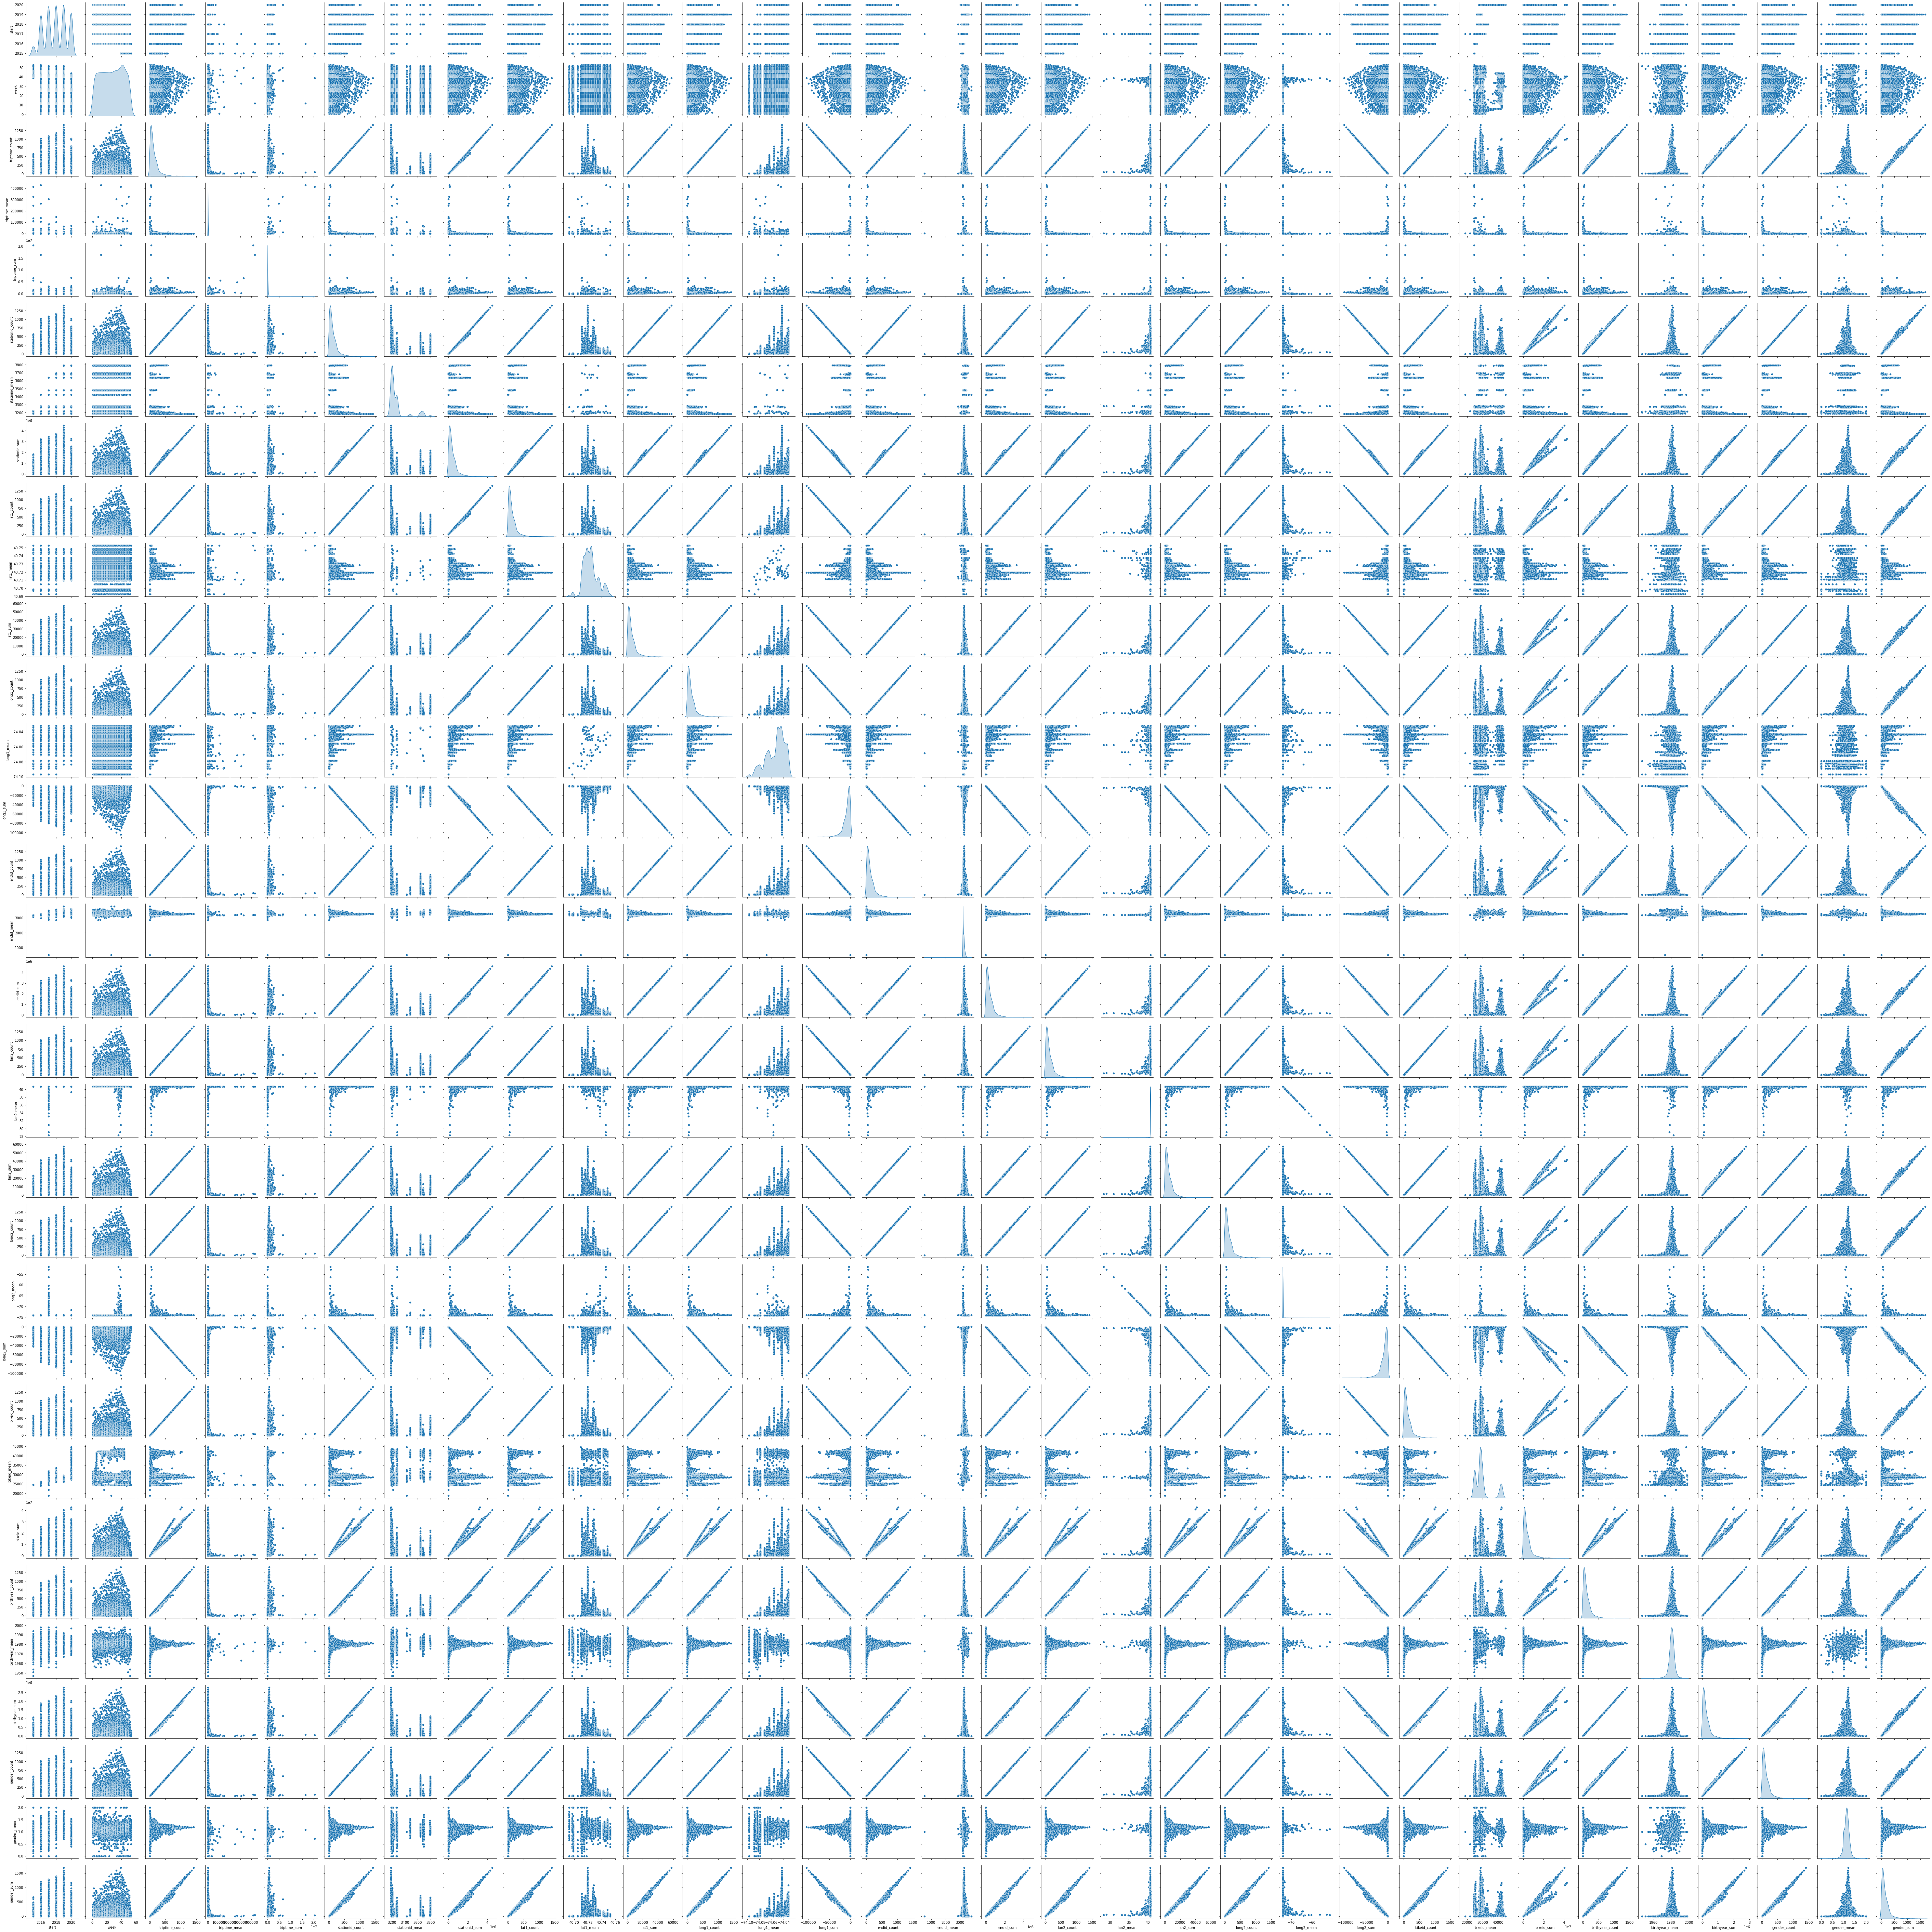

In [32]:
import seaborn as sns
sns_plot  = sns.pairplot(pairframe, diag_kind='kde')
sns_plot.savefig("output2.jpg",dpi=300)

In [27]:
newweekycount = everydata.groupby([ everydata['start'].dt.year,everydata['start'].dt.isocalendar().week,everydata['station1'],everydata['lat1'] ,everydata['long1']  ])['bikeid'].agg(['count'])
newweekycount.to_csv("newweekcount.csv")

In [23]:
newstations = everydata.groupby([ everydata['station1']  , everydata['lat1'] ,everydata['long1']  ]).count()
newstations.to_csv("newstations.csv")

In [24]:
newstations

Empty DataFrame
Columns: []
Index: [(5 Corners Library, 40.73496102000952, -74.05950307846071), (Astor Place, 40.71928220070703, -74.07126188278198), (Baldwin at Montgomery, 40.7236589, -74.0641943), (Bayside Park, 40.698650544, -74.082079678), (Bergen Ave, 40.72210378668603, -74.07145500183104), (Bethune Center, 40.70495751672861, -74.08593088388444), (Brunswick & 6th, 40.726011729646245, -74.0503889322281), (Brunswick St, 40.7241765, -74.05065640000001), (Central Ave, 40.7467299, -74.0492509), (Christ Hospital, 40.734785818, -74.050443636), (City Hall, 40.717732500000004, -74.04384499999999), (Columbia Park, 40.6970299, -74.09693659999999), (Columbus Dr at Exchange Pl, 40.71687, -74.03281), (Columbus Drive, 40.71835519823214, -74.03891444206238), (Communipaw & Berry Lane, 40.71435836870427, -74.06661093235016), (Danforth Light Rail, 40.69263996618329, -74.08801227807997), (Dey St, 40.737711, -74.066921), (Dixon Mills, 40.72163014263835, -74.04996782541275), (Essex Light Rail, 40.712774200000005, -74.03648570000001), (Exchange Place, 40.7162469, -74.0334588), (Fairmount Ave, 40.72572613742557, -74.07195925712584), (Garfield Ave Station, 40.7104670233797, -74.07003879547119), (Glenwood Ave, 40.72755146730012, -74.07106071710588), (Grand St, 40.71517767732029, -74.03768330812454), (Grove St PATH, 40.71958611647166, -74.0431174635887), (Hamilton Park, 40.727595965999996, -74.044247311), (Harborside, 40.71925170000001, -74.034234), (Heights Elevator, 40.748715945380226, -74.04044330120088), (Hilltop, 40.7311689, -74.0575736), (Hoboken Ave at Monmouth St, 40.73520838045357, -74.04696375131606), (JC Medical Center, 40.71653978099194, -74.0496379137039), (JCBS Depot, 40.70965083364061, -74.0686011314392), (Jackson Square, 40.71113, -74.0789), (Jersey & 3rd, 40.723331586464354, -74.04595255851744), (Jersey & 6th St, 40.72528910781132, -74.04557168483734), (Journal Square, 40.733670000000004, -74.0625), (Lafayette Park, 40.71346382669195, -74.06285852193831), (Leonard Gordon Park, 40.74590996631558, -74.05727148056029), (Liberty Light Rail, 40.711242299999995, -74.0557013), (Lincoln Park, 40.7246050998869, -74.07840594649316), (MLK Light Rail, 40.711130499999996, -74.0788855), (Manila & 1st, 40.72165072487999, -74.04288411140442), (Marin Light Rail, 40.71458403535893, -74.04281705617905), (McGinley Square, 40.7253399253558, -74.06762212514876), (Monmouth and 6th, 40.72568548362901, -74.0487903356552), (Montgomery St, 40.71942, -74.05099), (Morris Canal, 40.7124188237569, -74.03852552175522), (NJCU, 40.710108700000006, -74.0858489), (Newark Ave, 40.72152515, -74.046304543), (Newport PATH, 40.7272235, -74.03375890000001), (Newport Pkwy, 40.728744799999994, -74.03210820000001), (North St, 40.752559000000005, -74.044725), (Oakland Ave, 40.7376037, -74.05247829999999), (Paulus Hook, 40.7141454, -74.0335519), (Pershing Field, 40.742677141, -74.051788633), (Riverview Park, 40.7443187, -74.04399090000001), (Sip Ave, 40.730742625306576, -74.06378388404845), (Sip Ave, 40.73089709786179, -74.06391263008119), (Union St, 40.71821129999999, -74.08363940000001), (Van Vorst Park, 40.71848892, -74.047726625), (Warren St, 40.721123600000006, -74.03805095), (Washington St, 40.7242941, -74.0354826), (West Side Light Rail, 40.714402, -74.0887723), (York St, 40.71649, -74.04105)]

[64 rows x 0 columns]